# DAT300 - Compulsory assignment 1

## Group 40

Kaggle group: CodingGeese

## Members

- Pradeep Manoraj - PreyPython123
- Ole Christian Johnsrud - CodingGoose...bumps

## Introduction

The purpuse of the project is to be able to determine what type of forest one
has, based on collectable data about the given forest, such as elevation, 
slope, distance to nearest water, shade, type of soil, and more. 
The main goal of this particular project, is to able to distinguish and correctly classify the forest as "Cottonwood" and "Lodgepole", by applying 
methods like simple classfication model, ensemle model and neural networks. 

The roles in the groups would be fluid, since we decided that is the optimal 
way to learn every step in the process. However in the end, Pradeep had more weight in the preprocessing stage, while Ole had more work done in the neural 
network part. Both did play with number of layers and neurons to try and better the score in the Kaggle competition.

### Importing dataset in two ways

##### Libraries

Importing the necessary libraries that will be used further down

In [ ]:
# Preprocessing and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from copy import copy


# Model 1 - SciKit-learn
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression

# Model 2 - Ensamble model
from sklearn.ensemble import RandomForestClassifier

# Model 3 - Artificial Neural Network
from tensorflow.keras import models
from tensorflow.keras import layers

from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import metrics
from tensorflow.keras import regularizers

#### Connecting to Google Drive



In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


#### Downloading from Kaggle

Important to note here is that in order to download directly from kaggle one needs to create an API key under the username you have access with. Then, you save that .json-file in a directory on drive where you can nacvigate and access it later

##### Activation Pradeep

In [ ]:
! pip install kaggle 

! chmod 600 /content/drive/MyDrive/Compulsory_assigment_1/kaggle.json
%cd /content/drive/MyDrive/Compulsory_assigment_1/

import os
os.environ['KAGGLE_CONFIG_DIR']="/content/drive/MyDrive/Compulsory_assigment_1/"

!kaggle competitions download -c dat300-h2022-ca1

import zipfile
for file in os.listdir():
    if file.endswith(".zip"):
        with zipfile.ZipFile(file, "r") as zip_file:
            zip_file.extractall()
        os.remove(file)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
/content/drive/MyDrive/Compulsory_assigment_1
 83% 43.0M/51.8M [00:00<00:00, 232MB/s]
100% 51.8M/51.8M [00:00<00:00, 232MB/s]


###### Path Pradeep

In [ ]:
raw_df = pd.read_csv('/content/drive/MyDrive/Compulsory_assigment_1/train.csv', 
                     header=0, 
                     sep=';', 
                     index_col=0)

# Test set
test_df = pd.read_csv('/content/drive/MyDrive/Compulsory_assigment_1/test.csv', 
                      header=0, 
                      sep=';', 
                      index_col=0)

##### Activation Ole Christian

In [ ]:
! pip install kaggle 

! chmod 600 /content/drive/MyDrive/NMBU/DAT300/.kaggle/kaggle.json
%cd /content/drive/MyDrive/NMBU/DAT300/

import os
os.environ['KAGGLE_CONFIG_DIR']="/content/drive/MyDrive/NMBU/DAT300/.kaggle/"

!kaggle competitions download -c dat300-h2022-ca1

import zipfile
for file in os.listdir():
    if file.endswith(".zip"):
        with zipfile.ZipFile(file, "r") as zip_file:
            zip_file.extractall()
        os.remove(file)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
/content/drive/MyDrive/NMBU/DAT300
 83% 43.0M/51.8M [00:00<00:00, 152MB/s]
100% 51.8M/51.8M [00:00<00:00, 148MB/s]


###### Path Ole Christian

In [ ]:
raw_df = pd.read_csv(
    '/content/drive/MyDrive/NMBU/DAT300/Compulsory Assignment 1/train.csv', 
    header=0, 
    sep=';', 
    index_col=0)

# Test set
test_df = pd.read_csv(
    '/content/drive/MyDrive/NMBU/DAT300/Compulsory Assignment 1/test.csv', 
    header=0, 
    sep=';', 
    index_col=0)

## Preprocessing and visulatization

This is the section where we use the imported dataset we downloaded in the "Introduction" section and explore the dataset before making it ready for the classifiers and networks

##### Exploration

In [ ]:
raw_df.shape

(1398095, 52)

In [ ]:
raw_df.head(10)

National Park  Elevation (meters)  Aspect (azimuth)  Slope (degrees)  \
0  Mount Rainer                3204                65               22   
1  Mount Rainer                2688               309               34   
2  Mount Rainer                3137               267               13   
3  Mount Rainer                3286               300                7   
4      Yosemite                2864                82                3   
5  Mount Rainer                3467               293               37   
6  Mount Rainer                2643               219                8   
7  Mount Rainer                2780               349               22   
8  Mount Rainer                2708               141               14   
9  Mount Rainer                3289                34               35   

   Horizontal distance to water (meters)  Vertical distance to water (meters)  \
0                                     55                                   83   
1                                    278                                   61   
2                                    149                                   37   
3                                    275                                   56   
4                                    221                                  136   
5                                    247                                   20   
6                                    337                                    0   
7                                    129                                  207   
8                                     79                                    0   
9                                    293                                   27   

   Horizontal distance to road (meters)  Light at 9AM (hillshade)  \
0                                   566                       195   
1                                   224                       250   
2                                  3146                       190   
3                                   147                       241   
4                                  2184                       202   
5                                  1236                       202   
6                                  1104                       232   
7                                  4168                       217   
8                                  1167                       174   
9                                  1945                       223   

   Light at noon (hillshade)  Light at 3PM (hillshade)  ...  Soil 32  Soil 33  \
0                        214                       128  ...        0        0   
1                        223                        44  ...        0        0   
2                        256                       165  ...        0        0   
3                        167                       155  ...        0        0   
4                        250                       185  ...        0        0   
5                        221                       139  ...        0        0   
6                        228                        37  ...        0        0   
7                        248                       137  ...        0        0   
8                        229                       184  ...        0        1   
9                        203                       216  ...        0        0   

   Soil 34  Soil 35  Soil 36  Soil 37  Soil 38  Soil 39  Soil 40  Forest type  
0        0        0        0        0        0        0        0   Cottonwood  
1        0        0        0        0        0        0        0    Lodgepole  
2        0        0        0        1        0        0        0   Cottonwood  
3        0        0        0        0        0        0        0    Lodgepole  
4        0        0        0        0        0        0        0    Lodgepole  
5        0        0        0        0        0        0        0   Cottonwood  
6        0        0        0        0        0        0        0    Lodgepole  
7  

In [ ]:
# Inspecting missing values and printing if there are any

num_missingvalues = raw_df.isnull().sum().values.sum()
print(f"\nThere are {num_missingvalues} missing values in dataset\n") 


There are 0 missing values in dataset



In [ ]:
# General information about the dataset

raw_df.describe()

Elevation (meters)  Aspect (azimuth)  Slope (degrees)  \
count        1.398095e+06      1.398095e+06     1.398095e+06   
mean         2.993714e+03      1.511732e+02     1.527734e+01   
std          2.657025e+02      1.101787e+02     8.682650e+00   
min          1.923000e+03     -3.200000e+01    -3.000000e+00   
25%          2.775000e+03      6.000000e+01     9.000000e+00   
50%          2.969000e+03      1.220000e+02     1.400000e+01   
75%          3.214000e+03      2.470000e+02     2.000000e+01   
max          4.357000e+03      4.070000e+02     6.300000e+01   

       Horizontal distance to water (meters)  \
count                           1.398095e+06   
mean                            2.694844e+02   
std                             2.264219e+02   
min                            -7.400000e+01   
25%                             1.090000e+02   
50%                             2.100000e+02   
75%                             3.590000e+02   
max                             1.592000e+03   

       Vertical distance to water (meters)  \
count                         1.398095e+06   
mean                          5.092919e+01   
std                           6.838363e+01   
min                          -3.160000e+02   
25%                           3.000000e+00   
50%                           3.000000e+01   
75%                           7.700000e+01   
max                           6.320000e+02   

       Horizontal distance to road (meters)  Light at 9AM (hillshade)  \
count                          1.398095e+06              1.398095e+06   
mean                           1.758525e+03              2.117775e+02   
std                            1.334616e+03              3.132509e+01   
min                           -2.870000e+02             -1.000000e+00   
25%                            8.000000e+02              1.970000e+02   
50%                            1.409000e+03              2.180000e+02   
75%                            2.361000e+03              2.340000e+02   
max                            7.661000e+03              3.010000e+02   

       Light at noon (hillshade)  Light at 3PM (hillshade)  \
count               1.398095e+06              1.398095e+06   
mean                2.206731e+02              1.400680e+02   
std                 2.266792e+01              4.455101e+01   
min                 5.000000e+01             -5.000000e+01   
25%                 2.090000e+02              1.140000e+02   
50%                 2.240000e+02              1.410000e+02   
75%                 2.370000e+02              1.690000e+02   
max                 2.790000e+02              2.700000e+02   

       Horizontal distance to fire ignition point (meters)  ...       Soil 31  \
count                                       1.398095e+06    ...  1.398095e+06   
mean                                        1.564328e+03    ...  2.766264e-02   
std                                         1.124425e+03    ...  1.640044e-01   
min                                        -2.770000e+02    ...  0.000000e+00   
25%                                         7.710000e+02    ...  0.000000e+00   
50%                                         1.333000e+03    ...  0.000000e+00   
75%                                         2.062000e+03    ...  0.000000e+00   
max                                         8.074000e+03    ...  1.000000e+00   

            Soil 32       Soil 33       Soil 34       Soil 35       Soil 36  \
count  1.398095e+06  1.398095e+06  1.398095e+06  1.398095e+06  1.398095e+06   
mean   3.458349e-02  3.754680e-02  1.219302e-02  1.592667e-02  1.088910e-02   
std    1.827224e-01  1.900975e-01  1.097468e-01  1.251919e-01  1.037812e-01   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
50%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
75%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
max

##### Visualization

Histograms

<function matplotlib.pyplot.show(*args, **kw)>

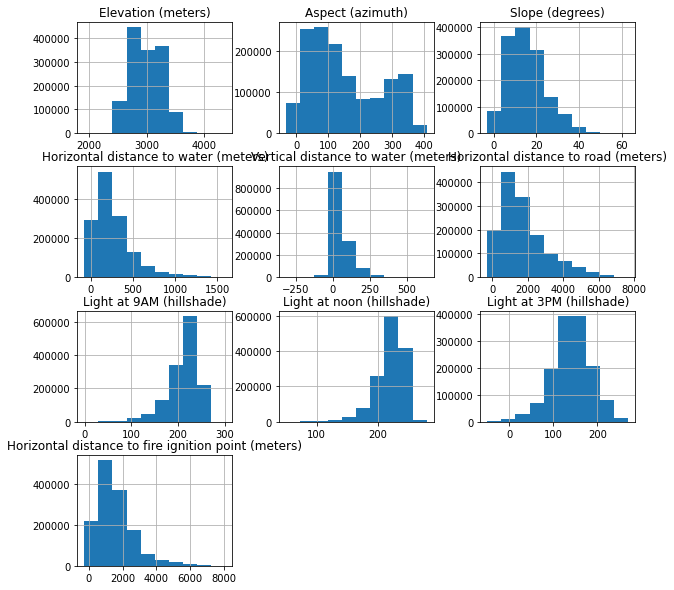

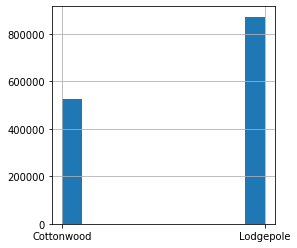

In [ ]:
#Histograms. Choosing to showcase the first 10 columns, since the last 40 
#consisting of data about soiltype, are binary. 
raw_df.iloc[:, :11].hist(figsize=(10,10))
plt.tight_layout
plt.show

plt.figure()
raw_df.iloc[:, -1].hist(figsize=(4,4))
plt.tight_layout
plt.show

Box plots

<function matplotlib.pyplot.show(*args, **kw)>

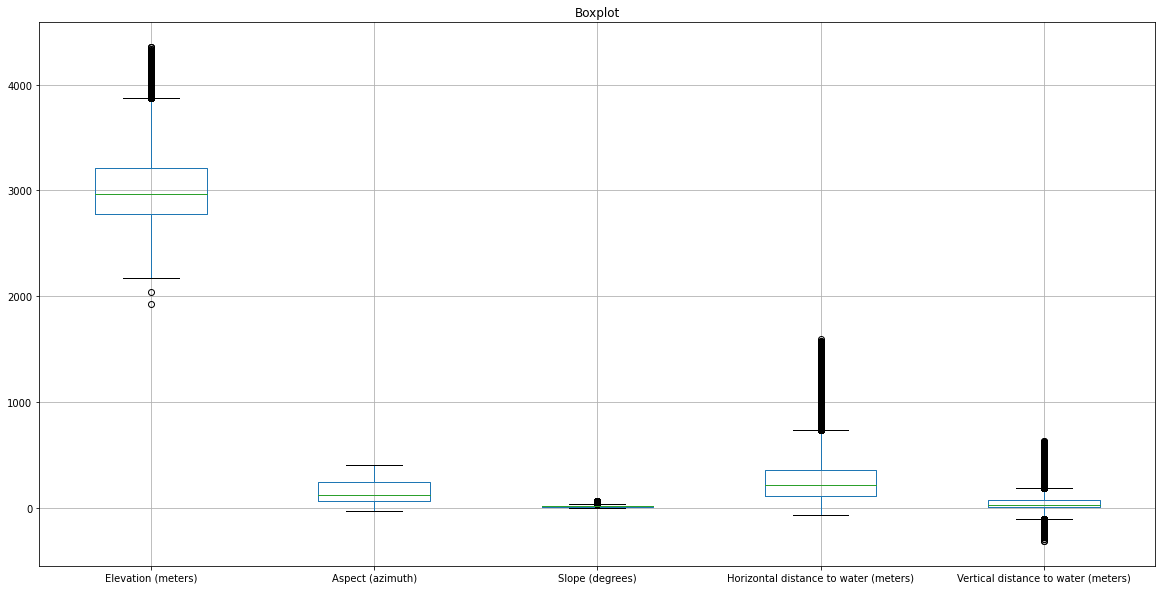

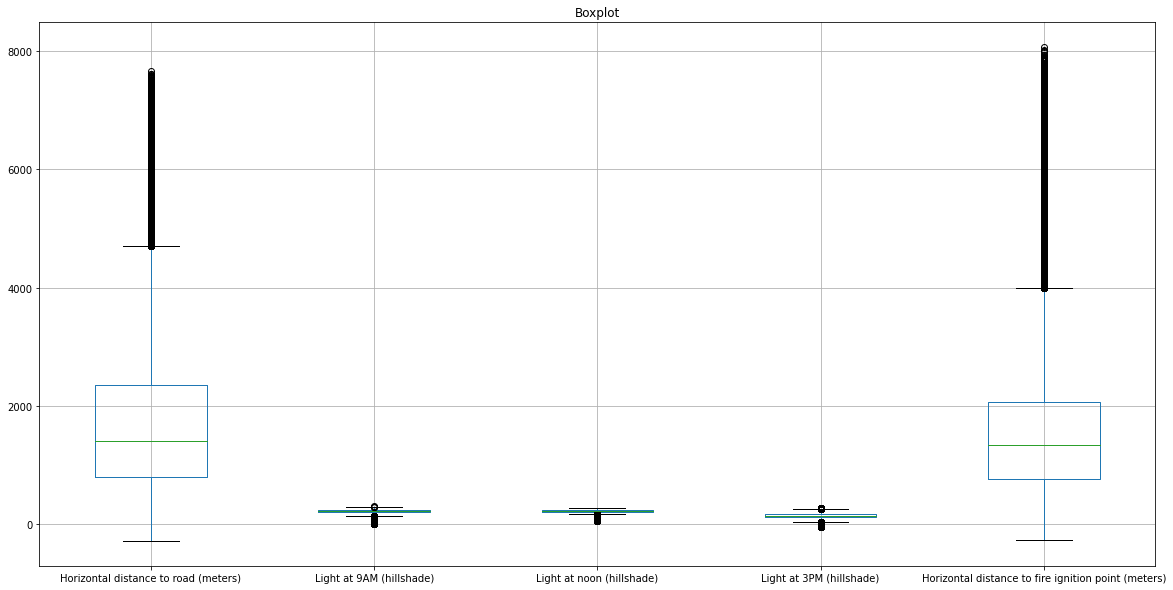

In [ ]:
#Box plots
plt.figure(figsize=(20,10))
plt.title('Boxplot')
raw_df.iloc[:, :6].boxplot()
plt.tight_layout
plt.show

plt.figure(figsize=(20,10))
plt.title('Boxplot')
raw_df.iloc[:, 6:11].boxplot()
plt.tight_layout
plt.show

Violin plots

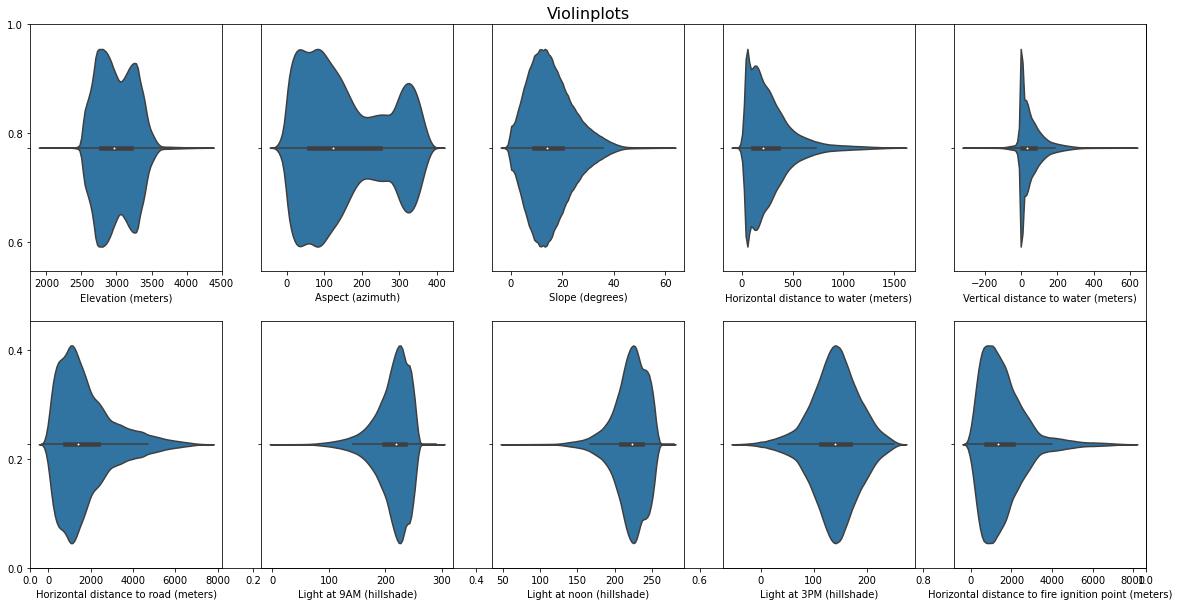

In [ ]:
numeric_df = raw_df.iloc[:, :11]
numeric_df = numeric_df.drop(columns=['National Park'])

fig_violin = plt.figure( figsize = (20,10))
plt.title('Violinplots', fontsize=16)
num_col = len(numeric_df.columns)
gridspec = fig_violin.add_gridspec(2, int(num_col/2)) #Creating a 3x3 gridspec
#For loop to go trough data in every column and place them in a 3x3 grid
for num, col in zip(range(num_col), numeric_df):
  if num < int(num_col/2):
    ax = fig_violin.add_subplot(gridspec[0,num])
    sns.violinplot(x=col, data = numeric_df)
  else: #else in the second row
    ax = fig_violin.add_subplot(gridspec[1,num-int(num_col/2)])
    sns.violinplot(x=col, data = numeric_df)

**Comments on visualization**

According the the histogram of "forest_type", the distribution between
"Cottonwood" and "Logdepole" are uneven. This unbalance would be necessary to take into consideration when evaluating the models based on scores.
According to the boxplots, one can clearly see the different scales of the features. The features need to be brought down to the same scale, so that the features are given equal importance based on spread within the feature, not between the features. Both the boxplots and violin plots show that few of the features may have some outliers, such as "Horisontal distance to water" and "Vertical distance to water". 

##### Preprocessing and scaling

In [ ]:
# Preprocessing the data
train_df = pd.get_dummies(raw_df)
print(train_df.head(5))

# Defining feature data 
X = train_df.iloc[:, :-2].values
print(f'Shape of X: {X.shape}')

# Target label 
# Choosing to only inlcude labeling as being 'Forest_type Cottonwood', 
# since it's a binary class problem. 
y = train_df.iloc[:, -2].values
print(f'Shape of y: {y.shape}')

# Splitting into training and validation set 
X_train, X_val, y_train, y_val = train_test_split(X, y, 
                                                  test_size=0.1, 
                                                  stratify = y, 
                                                  random_state=1)

   Elevation (meters)  Aspect (azimuth)  Slope (degrees)  \
0                3204                65               22   
1                2688               309               34   
2                3137               267               13   
3                3286               300                7   
4                2864                82                3   

   Horizontal distance to water (meters)  Vertical distance to water (meters)  \
0                                     55                                   83   
1                                    278                                   61   
2                                    149                                   37   
3                                    275                                   56   
4                                    221                                  136   

   Horizontal distance to road (meters)  Light at 9AM (hillshade)  \
0                                   566                       195   
1             

In [ ]:
# Scaling the data
sc = StandardScaler()
sc.fit(X_train)
X_train_scaled = sc.transform(X_train)


# important to scale using the same scale as training set 
X_val_scaled = sc.transform(X_val)

# Note
# we don't scale y-values since there are only two values: 0 and 1

## Modelling

### 1. Scikit-learn

Classification model based on algorithms from scikit-learn (e.g. logistic regression, possibly regularized, Support Vector Classifier, etc.).

We ended up with Logistic Regression, based upon the belif that this simple model would combat the possible overfitting because of the large training data. To further reduce the possibility of overfitting, regularization was added. Since there where 2 types of regularization, "l1" and "l2", and a large number of possible C-values, grid search was a strategy to optimize the search for the best parameters. The parameter range for C was altered strategilcaly after the first CV-round, to further optimize the parameter.Because of the big size in dimention, with the 54 features, a strategy to reduce and condence the information was opted for. LDA ended up scoring better than PCA in this instance. Becuse of binary class problem, number of components was locked on 2.  

For the ensemle model, Random Forest was chosen, because of the simplicity in use. The scoring was not bad for first efforts, so further exploration of other possible models was not done. 

As for failed efforts, PCA with number up to 15 components not score better than 0.7, so much time was spent finding optimal number of componentes. Number of cross-validation didn't seem to change the score so much, because of the size of data. Much computing time was spent with a high number for cv. Random forest did not score better after using cross-validation, and the computation time was high. Higher number of estimators gave slighlty better scores, but not optimal in terms of computation time. 

**The results can be found beneath**

#### 1.1 Logistic Regression

In [ ]:
pipe_lr_reg = make_pipeline(StandardScaler(), 
                            LDA(n_components=1), 
                            LogisticRegression(penalty='l2', 
                                               random_state= 42))

# For regularization parameter C.
param_range = [0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005]

# Creating a parameter grid for the Grid search, with two types of solvers,
# parameter range for C and regression penalties.

param_grid = [{'logisticregression__C': param_range,
               'logisticregression__solver': ['liblinear'],
               'logisticregression__penalty': ['l1', 'l2']}]

# Searching for the best parameters with Grid Search
gs = GridSearchCV(estimator=pipe_lr_reg,
                  param_grid=param_grid,
                  scoring='f1',
                  cv=2)
# Fitting the pipeline with estimator, 
# with the best parameters, to the training set
gs_lr = gs.fit(X_train, y_train) 

print(gs_lr.best_score_) # Getting the accuracy on the traning set
print(gs_lr.best_params_) # Getting the best parameters from the GS
lr_reg = gs_lr.best_estimator_

0.9322354045942778
{'logisticregression__C': 0.0001, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'liblinear'}


In [ ]:
# Making prediction

yhat = lr_reg.predict(X_val)

In [ ]:
# F1-score

f1_score(yhat, y_val)

0.9314448761990576

#### 1.2 RandomForest

In [ ]:
# Model
pipe_rand = make_pipeline(RandomForestClassifier(random_state=42))

# For regularization parameter C.
param_range2 = [100, 110, 120]

#Creating a parameter grid for the Grid search, with two types of solvers,
#parameter range for C and regression penalties.

param_grid2 = [{'randomforestclassifier__n_estimators': param_range2}]

#Searching for the best parameters with Grid Search
gs = GridSearchCV(estimator=pipe_rand,
                  param_grid=param_grid2,
                  scoring='f1',
                  cv=2)
#Fitting the pipeline with estimator, 
#with thebest parameters, to the training set
gs_rand = gs.fit(X_train, y_train) 

print(gs_rand.best_score_) #Getting the accuracy on the traning set
print(gs_rand.best_params_) #Getting the best parameters from the GS
rf_model = gs_rand.best_estimator_

RandomForestClassifier()

In [ ]:
# Prediction
rf_yhat = rf_model.predict(X_val)

In [ ]:
# F1-score
f1_score(rf_yhat, y_val)

0.9670254375196277

### 2. Neural Networks with Keras

**Report on methods involved, strategies, number of parameters, failed efforts (160-240 words)**

For our neural network we started with one layer but quickly added another one. In addition we played around with both number of epochs and the batch size. However, we didn't really get any improvements until the introduction of regularization. We also tried the "droput"-method, which would remove a set of neurons under training. Quickly after that we ended up with accuracy on both train and validation close to and just above 97%. We tried tweaking some of the parameters even more, but stuck with the "relu" activation throughout. Then, for a long time, we didn't think of cutting out regularization again but at the very end we did just to see what would happen. 

With the new number of layers and epochs/batch size, suddenly the model performed even better than with the regularization, beating it 0.9764 to 0.9756. The difference is not enormous but made the prediction jump up on the leaderboard on Kaggle. We are risking some overfitting with our huge batch size. However, seen as both training and validation accuracy have been constantly high, we feel the model doesn't overfit. 

A model with both "droput" and "regulizers" beat the "Beat_me" score in Kaggle, with 0.975, but the model without had the best score when submitting. 

In [ ]:
# Creating the model

ann_model = models.Sequential([
    layers.Dense(32, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    # layers.Dropout(0.05),
    # layers.Dense(32, kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.02), activation='relu'),
    layers.Dense(1, activation='sigmoid')])

In [ ]:
# Compiling the model

ann_model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [ ]:
# Training the model
history = ann_model.fit(X_train_scaled,
                    y_train,
                    epochs=100,
                    batch_size=8192,
                    validation_data=(X_val_scaled, y_val))

Epoch 1/100
154/154 [==============================] - 1s 5ms/step - loss: 0.0703 - binary_accuracy: 0.9730 - val_loss: 0.0735 - val_binary_accuracy: 0.9714
Epoch 2/100
154/154 [==============================] - 1s 5ms/step - loss: 0.0700 - binary_accuracy: 0.9732 - val_loss: 0.0691 - val_binary_accuracy: 0.9734
Epoch 3/100
154/154 [==============================] - 1s 5ms/step - loss: 0.0698 - binary_accuracy: 0.9731 - val_loss: 0.0708 - val_binary_accuracy: 0.9725
Epoch 4/100
154/154 [==============================] - 1s 5ms/step - loss: 0.0695 - binary_accuracy: 0.9734 - val_loss: 0.0706 - val_binary_accuracy: 0.9731
Epoch 5/100
154/154 [==============================] - 1s 5ms/step - loss: 0.0693 - binary_accuracy: 0.9733 - val_loss: 0.0686 - val_binary_accuracy: 0.9735
Epoch 6/100
154/154 [==============================] - 1s 5ms/step - loss: 0.0691 - binary_accuracy: 0.9734 - val_loss: 0.0675 - val_binary_accuracy: 0.9738
Epoch 7/100
154/154 [==============================] - 1s 

## Results of the Artificial Neural Network

In [ ]:
# Quick summary of the model

ann_model.summary()

In [ ]:
# Creating keys
history_dict = history.history
history_dict.keys()

In [ ]:
# Checking the accuracy and storing it
history_dict['val_binary_accuracy']

### Plotting

Plotting the *training accuracy* and *validation accuracy* against each other. Same with *training and validation loss*

#### Loss

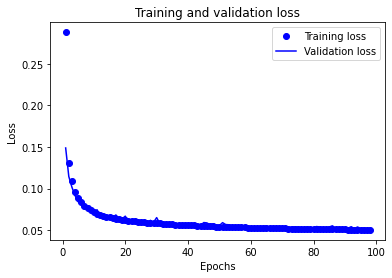

In [ ]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### Accuracy

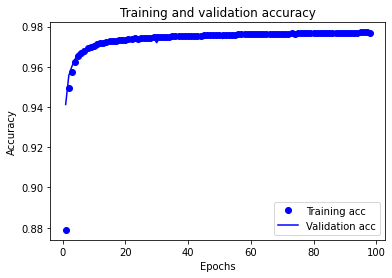

In [ ]:
plt.clf()   # clear figure
acc = history_dict['binary_accuracy']
val_acc = history_dict['val_binary_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## Discussion and conclusion

Provide a summary of the assignment: (you are required to address **the first three** points of the list below)
- obstacles / problems you have met regarding the modelling process
- degree of success of the three models
- given more time, what would be done differently
- further comments (if any)

**Summary**

**1. Obstacles/Problems** \
Deciding on which classifiers to use was obviously one of the first problems we encountered. Second was experiencing Nan-values with scaling manually, without the StandardScaler and transform. When dividing by zero even when the nominator was zero too, resulted in Nan-values. We solved this by replacing all the Nan-values with 0'es, but ultimately ended up using trasform from the StandardScaler. \\

**2. Degree of success** \
Surprisingly enough, even the Linear regression did fairly well on the classification. RandomForest was better (as expected) and provided relatively satisfactory results on accuracy. We ended up adding GridSearch for the RandomForest model, but in the end the score didn't massively improve. Didn't need much tuning. The neural networks model did pretty well in the Kaggle competition, even without any regularization. We ended up with 0.97646 as score, which was top 10 at time of final submission \\

**3. Improvements** \
With more time, we would have liked to explore what would happen with even more layers, and also what other activations would do with the accuracy. In addition, we worked with a pretty standard split between training and validation sets. Tinkering with these splits to avoid overfitting but at the same time optimize our model would be something else to explore. \
We could also, even though it should yield the same results, see what would happen if we managed to optimize a scikit-learn model even further to get the accuracy even further up. 

## Model on test set

To round up the script, we run the test set on our model before creating a csv-file that can be submitted to kaggle

### Preprocessing and Prediction

In [ ]:
# Checking shape and creating array with only values¨
test_df = pd.get_dummies(test_df)
X_test = test_df.values
print(f'Shape of X: {X_test.shape}')

# Scaling
X_test_scaled = sc.transform(X_test)

Shape of X: (599184, 54)


In [ ]:
# Prediction

pred_y = ann_model.predict(X_test_scaled)
pred_y = pred_y.ravel()

(599184, 1)
(599184,)


### Submission

In [ ]:
submission_df = pd.DataFrame({'Index':test_df.index, 
                              'Prediction_proba': pred_y})
submission_df = submission_df.set_index('Index')

def categorise(row):  
    if row['Prediction_proba'] >= 0 and row['Prediction_proba'] <= 0.5:
        return 'Lodgepole'
    return 'Cottonwood'

submission_df['Predicted'] = submission_df.apply(lambda row: categorise(row), 
                                                 axis=1)

submission_df = submission_df.drop('Prediction_proba', axis=1)

print(submission_df)

         Predicted
Index             
0        Lodgepole
1       Cottonwood
2        Lodgepole
3       Cottonwood
4       Cottonwood
...            ...
599179   Lodgepole
599180   Lodgepole
599181   Lodgepole
599182  Cottonwood
599183   Lodgepole

[599184 rows x 1 columns]


In [ ]:
# Creating csv-file for upload to kaggle
submission_df.to_csv('prediction_submission.csv')